In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from mlresearch.utils import set_matplotlib_style
from recgame.environments._cda_environment import ModelRetrainEnvironment
from recgame.recourse import DiCE, NFeatureRecourse
from recgame.utils import generate_synthetic_data

In [10]:
set_matplotlib_style(16)

# Some variables to define the problem
RNG_SEED = 42
rng = np.random.default_rng(RNG_SEED+1)
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 100

# Environment variables
N_LOANS = 10  # np.array([20, 1, 10, 30, 0, 5, 50, 10, 40])
ADAPTATION = .1  # np.array([.2, .1, .3, .25, .1, .4, .05, .05, .2])
NEW_AGENTS = 10  # np.array([40, 10, 50, 5, 0, 100, 0, 0, 20])

df, y, categorical = generate_synthetic_data(N_AGENTS, N_CONTINUOUS, N_CAT, RNG_SEED)

# model = RandomForestClassifier().fit(df, y)
model = LogisticRegression().fit(df, y)

In [11]:
def data_source_func(n_agents):
    X, _, _ = generate_synthetic_data(
        n_agents=n_agents,
        n_continuous=N_CONTINUOUS,
        n_categorical=N_CAT,
        random_state=rng,
    )
    return X

# Environment experiment

In [12]:
# Define the necessary components to run simulation
recourse = NFeatureRecourse(model, categorical=categorical)
recourse.set_actions(df)
recourse.action_set_.ub = [2, 2]

environment = ModelRetrainEnvironment(
    X=df,
    recourse=recourse,
    data_source_func=data_source_func,
    threshold=N_LOANS,
    threshold_type="absolute",
    adaptation=ADAPTATION,
    behavior_function="binary_constant",
    growth_rate=NEW_AGENTS,
    growth_rate_type="absolute",
    random_state=RNG_SEED,
)

environment.simulate(9)

ModelRetrainEnvironment(X=         f_0       f_1
0   0.601572  0.153339
1   0.750150  0.813522
2  -0.150345  0.065940
3   0.542613  0.394586
4   0.494400  0.215652
..       ...       ...
95  1.074555  0.440160
96  0.372271  0.987148
97  0.130985  0.201758
98  0.714442  0.368465
99  0.498293  0.445519

[100 rows x 2 columns],
                        adaptation=0.1, behavior_function='binary_constant',
                        data_source_func=<function data_source_func at 0x7f6ac140e4d0>,
                        growth_rate=10, growth_rate_type='absolute',
                        random_state=42,
                        recourse=NFeatureRecourse(categorical=[],
                                                  model=LogisticRegression(),
                                                  threshold=0.16693448398583255),
                        threshold=10)

In [13]:
environment.X_, environment.outcome_

from collections import Counter
Counter(environment.outcome_)

Counter({0: 90, 1: 10})

<Axes: title={'center': 'Population scores over 9 time steps'}, xlabel='Step', ylabel='Score'>

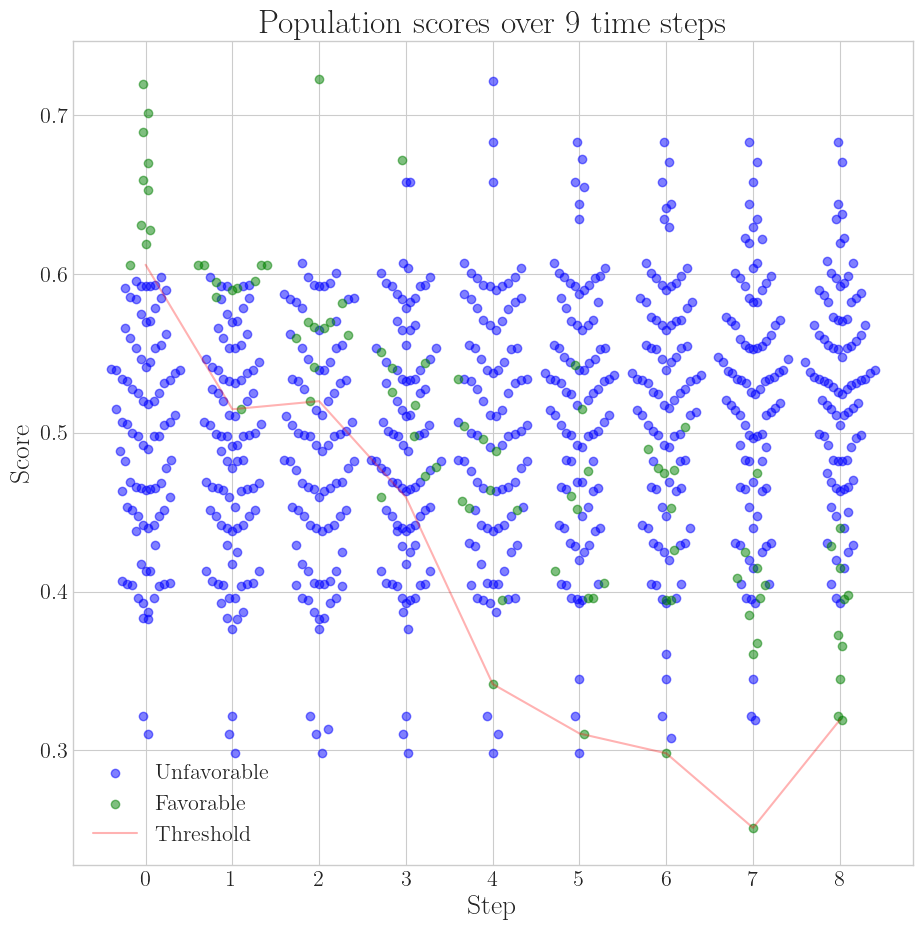

In [14]:
environment.plot.agent_scores(ref_model_step=0)

<Axes: title={'center': 'Population at t=5'}, xlabel='f_0', ylabel='f_1'>

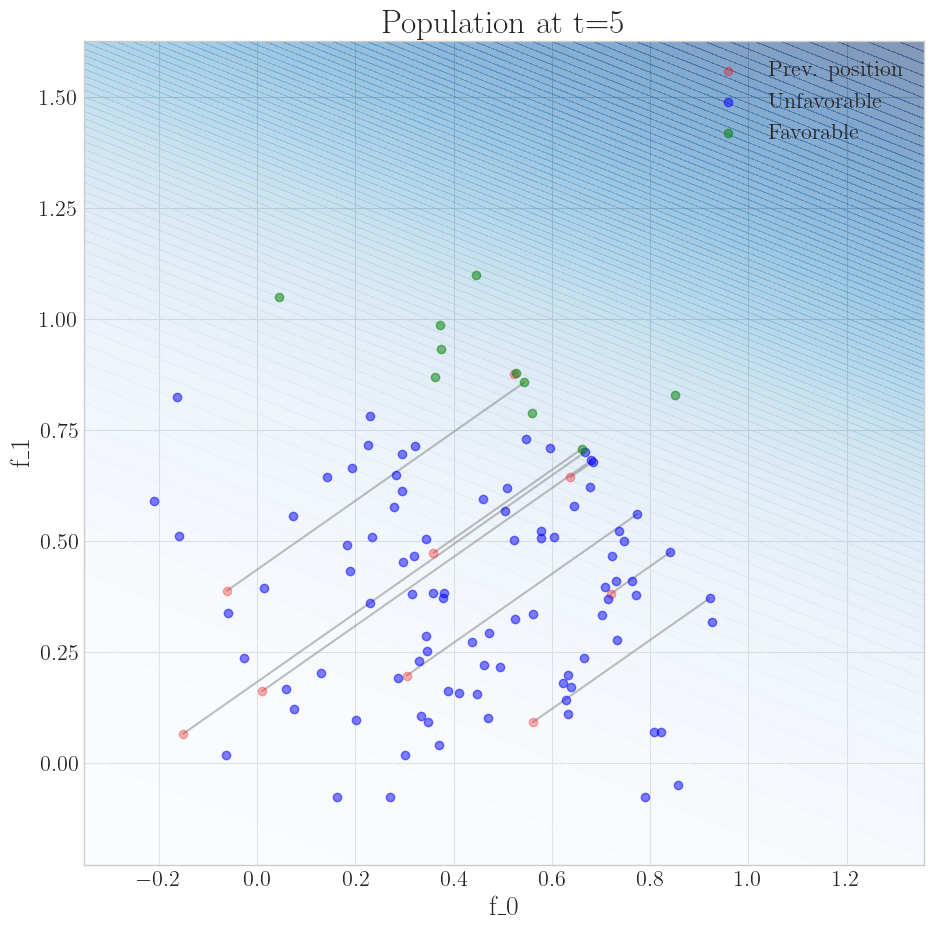

In [15]:
environment.plot.scatter(5)

<Axes: title={'center': 'Population at t=4'}, xlabel='f_0', ylabel='f_1'>

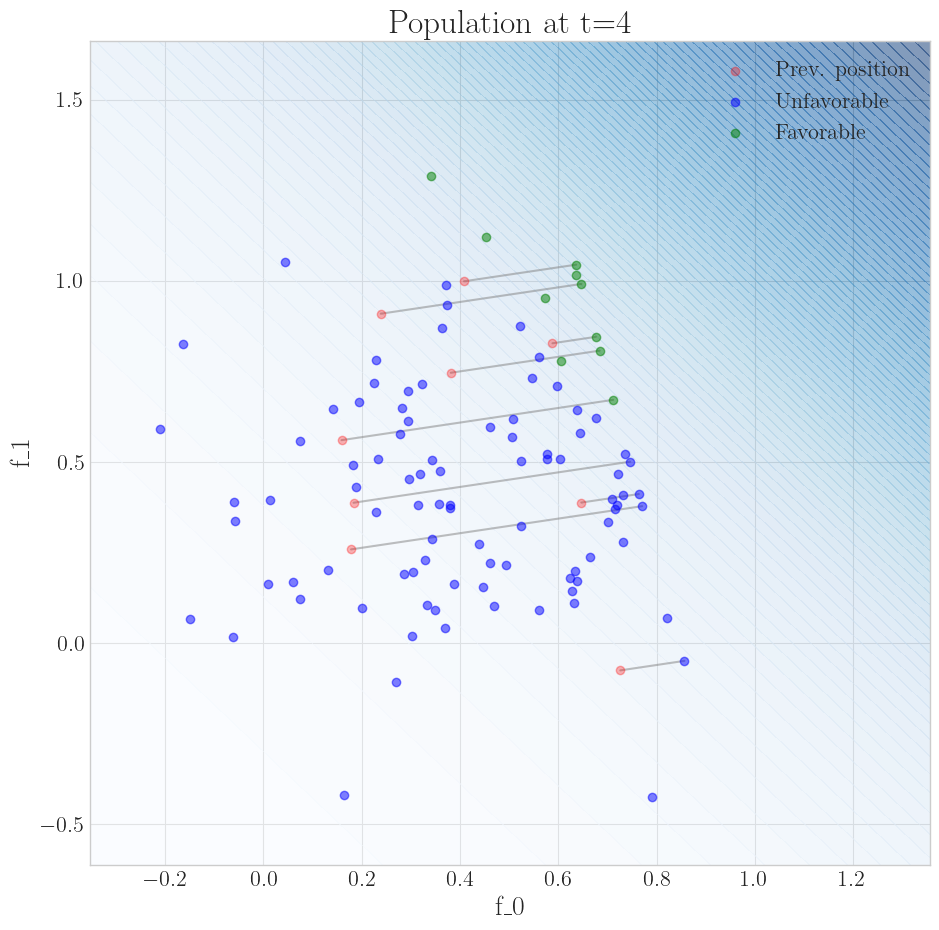

In [16]:
environment.plot.scatter(4)

<Axes: title={'center': 'Population at t=5'}, xlabel='f_0', ylabel='f_1'>

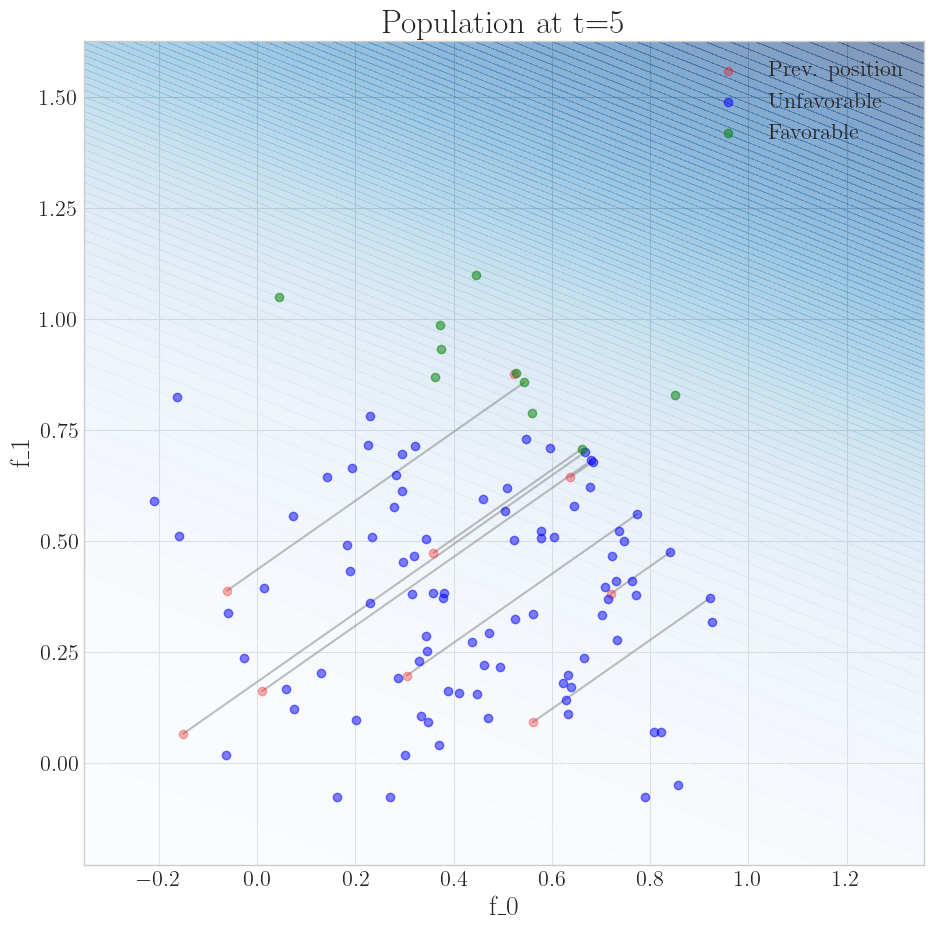

In [17]:
environment.plot.scatter(5)

<Axes: title={'center': 'Population at t=6'}, xlabel='f_0', ylabel='f_1'>

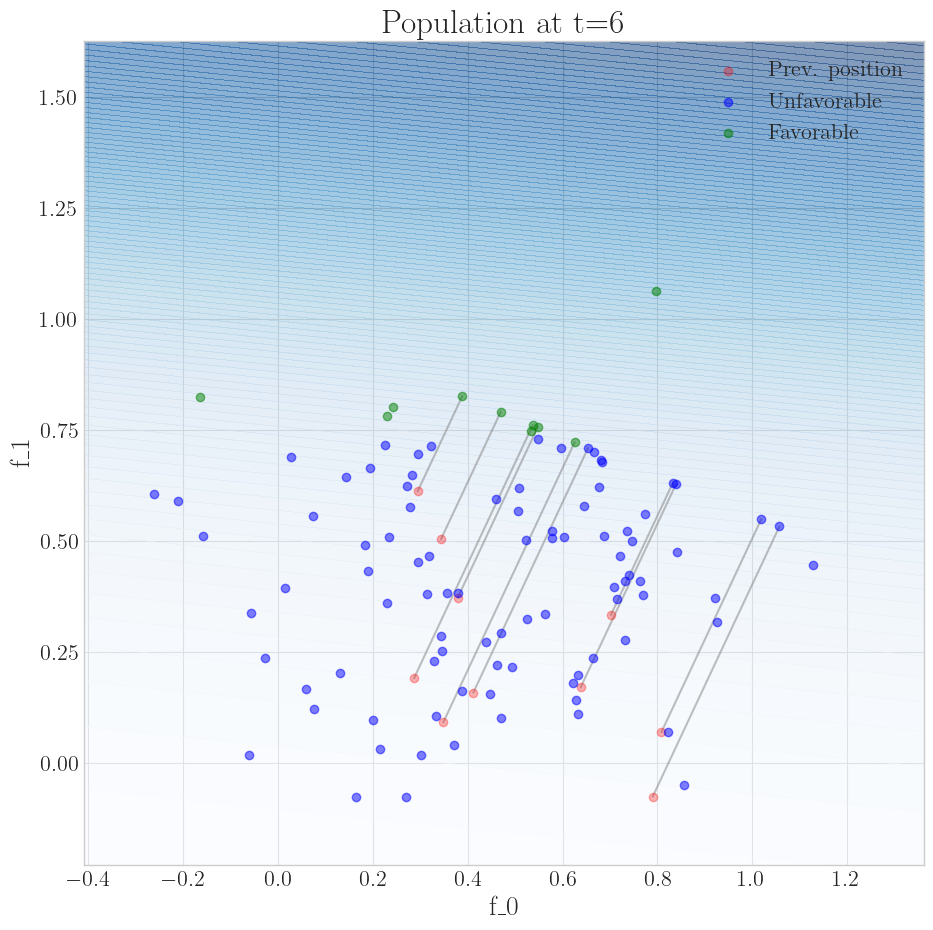

In [18]:
environment.plot.scatter(6)